# 画像の相互相関を見る

In [27]:
#import
import sys
import os
import glob
import math
import itertools

import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

sys.path.append('../')
from pyopt import modulate as md

# 1. PRBS信号の自己相関を見る

In [3]:
N = 7  # PRBSの次数
itr = 1  # PRBSの繰り返し回数
form = 'RZ16QAM'  # 変調方式
n = 32  # 1シンボルあたりのサンプリング数[/symbol]
equalize = False  # 各シンボル数を均等にするか

bitsq = md.prbs(N=N, itr=itr)

In [4]:
correlation = [0] * len(bitsq)
for i in tqdm(range(len(bitsq))):
    xor = 0
    for j in range(len(bitsq)):
        if j + i < len(bitsq):
            xor += bitsq[j] ^ bitsq[j + i]
        else:
            xor += bitsq[j] ^ bitsq[j + i - len(bitsq)]
    if i < len(bitsq) // 2:
        correlation[len(bitsq) // 2 + i] = 1 - xor / len(bitsq)
    else:
        correlation[i - len(bitsq) // 2] = 1 - xor / len(bitsq)

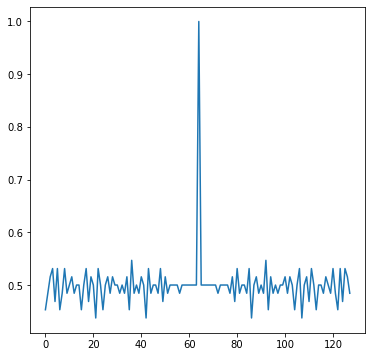

In [5]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(correlation);

# 2. 画像

In [6]:
def load_image(target_dir, image_number):
    image_dir = '../data/image/'
    image_path_list = sorted(glob.glob(os.path.join(image_dir + target_dir, '*.jpg')))
    image_path = image_path_list[image_number]
    img = Image.open(image_path)
    return img

In [20]:
def image_correlation(img_array0, img_array1):
    correlation = np.zeros((img_array0.shape[0], img_array0.shape[1]), dtype=float)
    for i in range(img_array0.shape[0]):
        for j in range(img_array0.shape[1]):
            xor = 0
            for k in range(3):
                xor += bin(img_array0[i, j, k] ^ img_array1[i, j, k]).count('1')
            correlation[i, j] = 1 - xor / 24
    return correlation

## 2.1 画像の自己相関を見る

(768, 1024, 3)


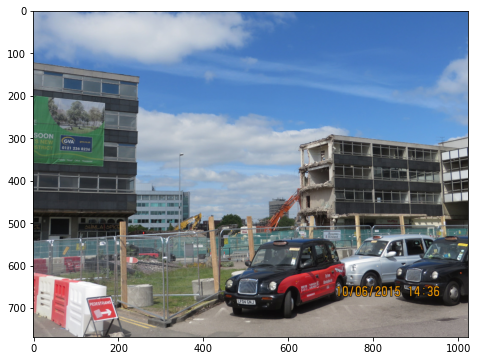

In [8]:
target_dir = 'train_0'
image_number = 3

img = load_image(target_dir, image_number)
img_array = np.array(img)
print(img_array.shape)

fig = plt.figure(figsize=(9, 6))
plt.imshow(img);

In [9]:
corr = image_correlation(img_array, img_array)
print(corr)


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


## 2.2 画像の相互相関を見る

(685, 1024, 3)
(768, 1024, 3)


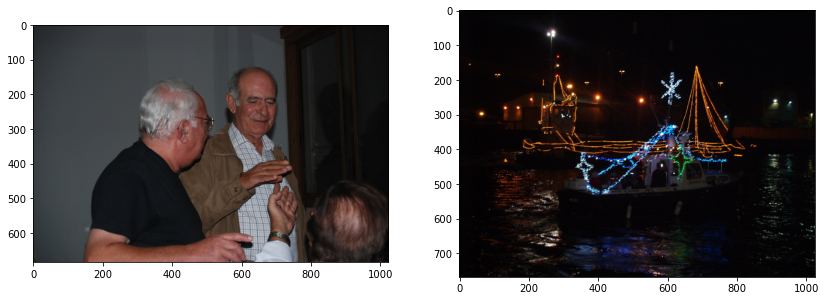

In [40]:
target_dir = 'train_0'
image_number0 = 4
image_number1 = 8

img0 = load_image(target_dir, image_number0)
img_array0 = np.array(img0)
print(img_array0.shape)
img1 = load_image(target_dir, image_number1)
img_array1 = np.array(img1)
print(img_array1.shape)

fig = plt.figure(figsize=(14, 6))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.imshow(img0)
ax1.imshow(img1);

In [25]:
corr = image_correlation(img_array0[:min(img_array0.shape[0], img_array1.shape[0]), :min(img_array0.shape[1], img_array1.shape[1])], img_array1[:min(img_array0.shape[0], img_array1.shape[0]), :min(img_array0.shape[1], img_array1.shape[1])])
print(corr)
print(np.mean(corr))

[[0.5        0.375      0.5        ... 0.41666667 0.45833333 0.54166667]
 [0.45833333 0.41666667 0.41666667 ... 0.29166667 0.45833333 0.54166667]
 [0.375      0.375      0.45833333 ... 0.5        0.41666667 0.375     ]
 ...
 [0.45833333 0.33333333 0.375      ... 0.41666667 0.375      0.33333333]
 [0.375      0.33333333 0.33333333 ... 0.375      0.375      0.41666667]
 [0.45833333 0.375      0.20833333 ... 0.375      0.375      0.375     ]]
0.571510255798813


## 2.3 画像の相互相関の分布を見る

In [33]:
target_dir = 'train_0'
corrs = []
num = 100
for nums in tqdm(itertools.combinations([i for i in range(num)], 2), total=num*(num-1)//2):
    img0 = load_image(target_dir, nums[0])
    img_array0 = np.array(img0)
    img1 = load_image(target_dir, nums[1])
    img_array1 = np.array(img1)
    if img_array0.ndim != 3 or img_array1.ndim != 3:
        continue
    corr = image_correlation(img_array0[:min(img_array0.shape[0], img_array1.shape[0]), :min(img_array0.shape[1], img_array1.shape[1])], img_array1[:min(img_array0.shape[0], img_array1.shape[0]), :min(img_array0.shape[1], img_array1.shape[1])])
    corr_mean = np.mean(corr)
    if corr_mean < 0.46 or corr_mean > 0.54:
        print(corr_mean, nums[0], 'and', nums[1])
    corrs.append(corr_mean)

0.571510255798813 2 and 8
0.5541200465318149 2 and 15
0.5400530198248041 2 and 51
0.5425346170798342 2 and 67
0.5415898779325139 2 and 77
0.5575117768091615 2 and 92
0.5532347213390264 2 and 97
0.5950105616065998 4 and 8
0.5508395229812956 4 and 15
0.5413095223588382 4 and 19
0.4313209849262468 4 and 31
0.5403992144730839 4 and 32
0.5621718060941303 4 and 51
0.4567452906402069 4 and 58
0.5442040659215327 4 and 63
0.5547654844016899 4 and 69
0.42327972931873475 4 and 71
0.5471507352941178 4 and 73
0.5444280694000911 4 and 78
0.5424703704759731 4 and 83
0.5476287559226706 4 and 84
0.5781949750988443 4 and 92
0.5606963294555962 4 and 97
0.5588586551626935 4 and 99
0.568381980613426 8 and 11
0.5466599322459126 8 and 14
0.6028013759189182 8 and 15
0.5865888133868948 8 and 19
0.5491704332806805 8 and 20
0.5694314462167245 8 and 22
0.5561817475479017 8 and 24
0.5576946357216933 8 and 28
0.36675326029459643 8 and 31
0.5550386823296837 8 and 32
0.5561439196268718 8 and 36
0.5450399186876084 8 a

(array([  0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,
          1.,   1.,   3.,   1.,   3.,   1.,   1.,   3.,   6.,   3.,   9.,
         17.,  12.,  18.,  26.,  37.,  61.,  64., 102., 162., 217., 292.,
        414., 549., 507., 428., 384., 313., 223., 202., 155., 136., 100.,
         76.,  46.,  44.,  30.,  28.,  18.,  19.,   8.,   5.,   2.,   5.,
          2.,   2.,   1.,   0.,   3.,   1.,   0.,   1.,   0.,   2.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.]),
 array([0.34675326, 0.35013806, 0.35352286, 0.35690766, 0.36029246,
        0.36367726, 0.36706206, 0.37044686, 0.37383166, 0.37721646,
        0.38060126, 0.38398606, 0.38737085, 0.39075565, 0.39414045,
        0.39752525, 0.40091005, 0.40429485, 0.40767965, 0.41106445,
        0.41444925, 0.41783405, 0.42121885, 0.

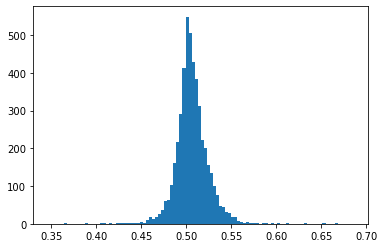

In [44]:
plt.hist(corrs, bins=100, range=(min(corrs)-0.02, max(corrs)+0.02))
#plt.yscale('log');

In [32]:
a = 100
print(a*(a-1)//2)

4950
